In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read and Merge Dengue Data
# loading do CSV de features e labels e merge dos dados:
# loading do CSV de features e labels e merge dos dados:
df_features = pd.read_csv("dados/dengue_features_train.csv", na_values=[" ","...","na","NA","nan","Na"])
df_labels = pd.read_csv("dados/dengue_labels_train.csv",na_values=[" ","...","na","NA","nan","Na"])
df_dengue = pd.merge(df_features,df_labels)
df_dengue

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [3]:
### Suprimindo as colunas que identificam nomes, períodos ou ciclos da tabela de treino e teste.
df_dengue = df_dengue[['city',"year",'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases']]

In [4]:
df_dengue["city"] = df_dengue.city.replace(["sj","iq"],[0,1])

<ipython-input-4-548d99fe649b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dengue["city"] = df_dengue.city.replace(["sj","iq"],[0,1])


In [5]:
# Transforming Nas to another values
df_dengue.interpolate(method="index", limit_direction="forward", inplace=True)

<ipython-input-5-27b859afaef0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dengue.interpolate(method="index", limit_direction="forward", inplace=True)


In [6]:
# SPLIT dos dados - training and test
from sklearn.model_selection import train_test_split
y = df_dengue["total_cases"]
X = df_dengue.drop(columns="total_cases", axis=1)

In [7]:
## Split Train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=600)

In [8]:
# Training the XGB model
xg_reg = xgb.XGBRegressor(objective="reg:linear", colsample_bytree = 0.6, learning_rate=0.2,
                         max_depth=3, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
xg_reg.score(X_test, y_test)

[02:19:40] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:40] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


0.7695236893317502

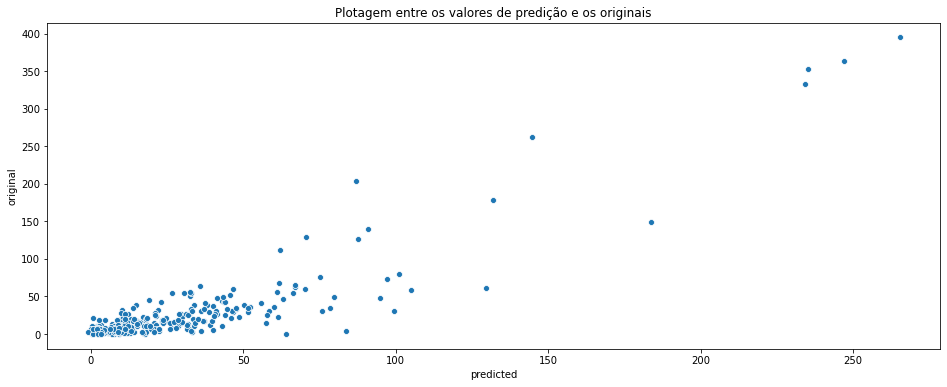

In [9]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=(pd.DataFrame({"predicted":xg_reg.predict(X_test), "original":y_test})), x="predicted", y="original")
plt.title("Plotagem entre os valores de predição e os originais")
plt.show()

In [10]:
# Converting to a matrix XGBoost
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [11]:
%%html
<h2> Testing with Min Max Scaler from Features Data

In [12]:
# Min Max transformation X 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_2 = pd.DataFrame(scaler.fit_transform(X.iloc[:,1:]))
X_1 = X["city"]
X_min_max = pd.merge(X_1,X_2, left_index=True, right_index=True)

In [13]:
# Split TRain and Test
X_train, X_test, y_train, y_test = train_test_split(X_min_max , y, test_size=0.2, random_state=600)

In [14]:
# XGBD Model and Score for min max features
# Training the XGB model
xg_reg = xgb.XGBRegressor(objective="reg:linear", colsample_bytree = 0.7, learning_rate=0.2,
                         max_depth=5, alpha=0., n_estimators=100)
xg_reg.fit(X_train, y_train)
xg_reg.score(X_test, y_test)

[02:19:41] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:42] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


0.8929353088551655

In [15]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, xg_reg.predict(X_test))

9.902915064194431

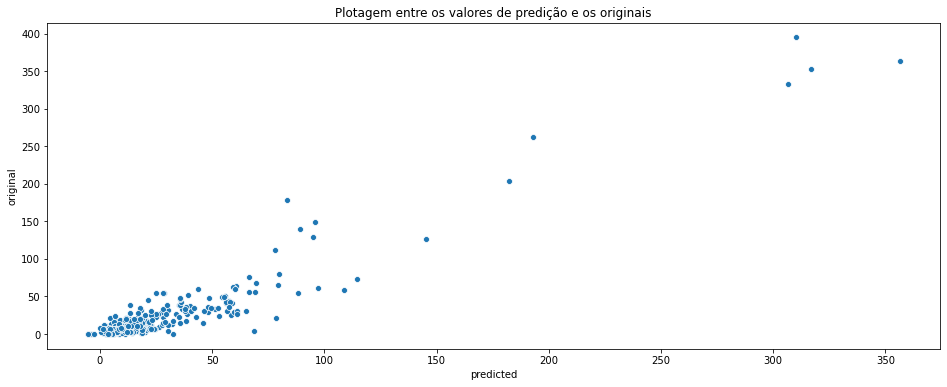

In [16]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=(pd.DataFrame({"predicted":xg_reg.predict(X_test), "original":y_test})), x="predicted", y="original")
plt.title("Plotagem entre os valores de predição e os originais")
plt.show()

In [17]:
# Converting to a matrix XGBoost
data_dmatrix_min_max = xgb.DMatrix(data=X_min_max, label=y)

In [18]:
%%html
<h2> Testing with Polinomial Features </h2>

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = pd.DataFrame(poly.fit_transform(X))

In [20]:
# Split TRain and Test
X_train, X_test, y_train, y_test = train_test_split(X_poly , y, test_size=0.2, random_state=600)

In [21]:
# Xgbd Model with Min Max Scaler and Plynomial transform.
# XGBD Model and Score for min max features
# Training the XGB model
xg_reg_poly = xgb.XGBRegressor(objective="reg:linear", colsample_bytree = 0.7, learning_rate=0.2,
                         max_depth=3, alpha=5, n_estimators=100)
xg_reg_poly.fit(X_train, y_train)
xg_reg_poly.score(X_test, y_test)

[02:19:44] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:49] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


0.819376379349567

In [22]:
%%html 
<h2> Test with hot encoded categorical variables  </h2>

In [23]:
# Read and Merge Dengue Data
# loading do CSV de features e labels e merge dos dados:
# loading do CSV de features e labels e merge dos dados:
df_features = pd.read_csv("dados/dengue_features_train.csv", na_values=[" ","...","na","NA","nan","Na"])
df_labels = pd.read_csv("dados/dengue_labels_train.csv",na_values=[" ","...","na","NA","nan","Na"])
df_dengue = pd.merge(df_features,df_labels)
### Suprimindo as colunas que identificam nomes, períodos ou ciclos da tabela de treino e teste.
df_dengue = df_dengue[['city',"year",'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases']]

In [24]:
### Encoded with one hot the city categorical variables:
#### Converting categorical city to once_hot_encoder and merge again with df
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore")
cities = pd.DataFrame(enc.fit_transform(df_dengue[["city"]]).toarray(), columns=[["iq", "sj"]])
df_dengue = pd.merge(cities, df_dengue, left_index=True ,right_index=True)
df_dengue.drop(columns="city", inplace=True)
### Rename colums names
df_dengue.rename(columns= {('iq',):"iq", ('sj',) :"sj"}, inplace=True)
df_dengue

,iq,sj,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0.0,1.0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,0.0,1.0,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,0.0,1.0,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,0.0,1.0,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,0.0,1.0,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1.0,0.0,2010,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,1.0,0.0,2010,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,1.0,0.0,2010,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,1.0,0.0,2010,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [25]:
# SPLIT dos dados - training and test
from sklearn.model_selection import train_test_split
y = df_dengue["total_cases"]
X = df_dengue.drop(columns="total_cases", axis=1)

In [26]:
## Split Train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=600)

In [27]:
# Training the XGB model
xg_reg_cat = xgb.XGBRegressor(objective="reg:linear", colsample_bytree = 0.5, learning_rate=0.2,
                         max_depth=2, alpha=10, n_estimators=100)
xg_reg_cat.fit(X_train, y_train)
xg_reg_cat.score(X_test, y_test)

[02:19:50] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:51] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


0.8339956993344062

In [28]:
%%html
<h2> Working 

In [29]:
%%html
<h2 align="center"> Implementing Xgboost with Dmatrix </h2>

[02:19:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:52] WARNING: ../src/learner.cc:516: 
Parameters: { col_sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:19:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:52] WARNING: ../src/learner.cc:516: 
Parameters: { col_sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:19:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated

[02:19:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:52] WARNING: ../src/learner.cc:516: 
Parameters: { col_sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:19:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:52] WARNING: ../src/learner.cc:516: 
Parameters: { col_sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:19:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated

[02:19:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:52] WARNING: ../src/learner.cc:516: 
Parameters: { col_sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:19:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:52] WARNING: ../src/learner.cc:516: 
Parameters: { col_sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:19:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated

[02:19:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:52] WARNING: ../src/learner.cc:516: 
Parameters: { col_sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:19:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:52] WARNING: ../src/learner.cc:516: 
Parameters: { col_sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:19:52] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated


[02:19:53] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:53] WARNING: ../src/learner.cc:516: 
Parameters: { col_sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:19:53] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:53] WARNING: ../src/learner.cc:516: 
Parameters: { col_sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:19:53] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecate


[02:19:53] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:53] WARNING: ../src/learner.cc:516: 
Parameters: { col_sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:19:53] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:53] WARNING: ../src/learner.cc:516: 
Parameters: { col_sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:19:53] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecate

[02:19:53] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:53] WARNING: ../src/learner.cc:516: 
Parameters: { col_sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:19:53] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:53] WARNING: ../src/learner.cc:516: 
Parameters: { col_sample_bytree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:19:53] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated

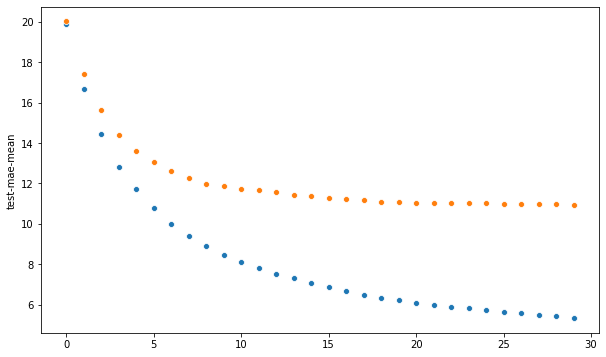

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,19.887441,0.052126,20.009181,16.222899
1,16.675511,0.042687,17.431552,14.477345
2,14.424593,0.041878,15.627218,12.924919
3,12.818589,0.044414,14.404515,11.945699
4,11.741958,0.103404,13.590594,11.028728
5,10.791683,0.110724,13.038418,10.316955
6,9.988465,0.090938,12.590994,9.815501
7,9.389347,0.098361,12.258203,9.438901
8,8.887877,0.085781,11.984253,9.100195
9,8.482197,0.094323,11.852614,8.877091


In [30]:
params = {"objective" : "reg:linear", 
          "col_sample_bytree" : 0.7, 
          "learning_rate" : 0.2,
          "max_depth" : 5,
          "alpha" : 0 }


cv_results = xgb.cv(dtrain=data_dmatrix_min_max, params=params, nfold=300, 
                   num_boost_round=30, metrics={'mae'} ,early_stopping_rounds=20, as_pandas=True)

plt.figure(figsize=(10,6))
sns.scatterplot(data=cv_results, x=range(0,len(cv_results)), y="train-mae-mean")
sns.scatterplot(data=cv_results, x=range(0,len(cv_results)), y="test-mae-mean")
plt.show()
cv_results

<Figure size 360x360 with 0 Axes>

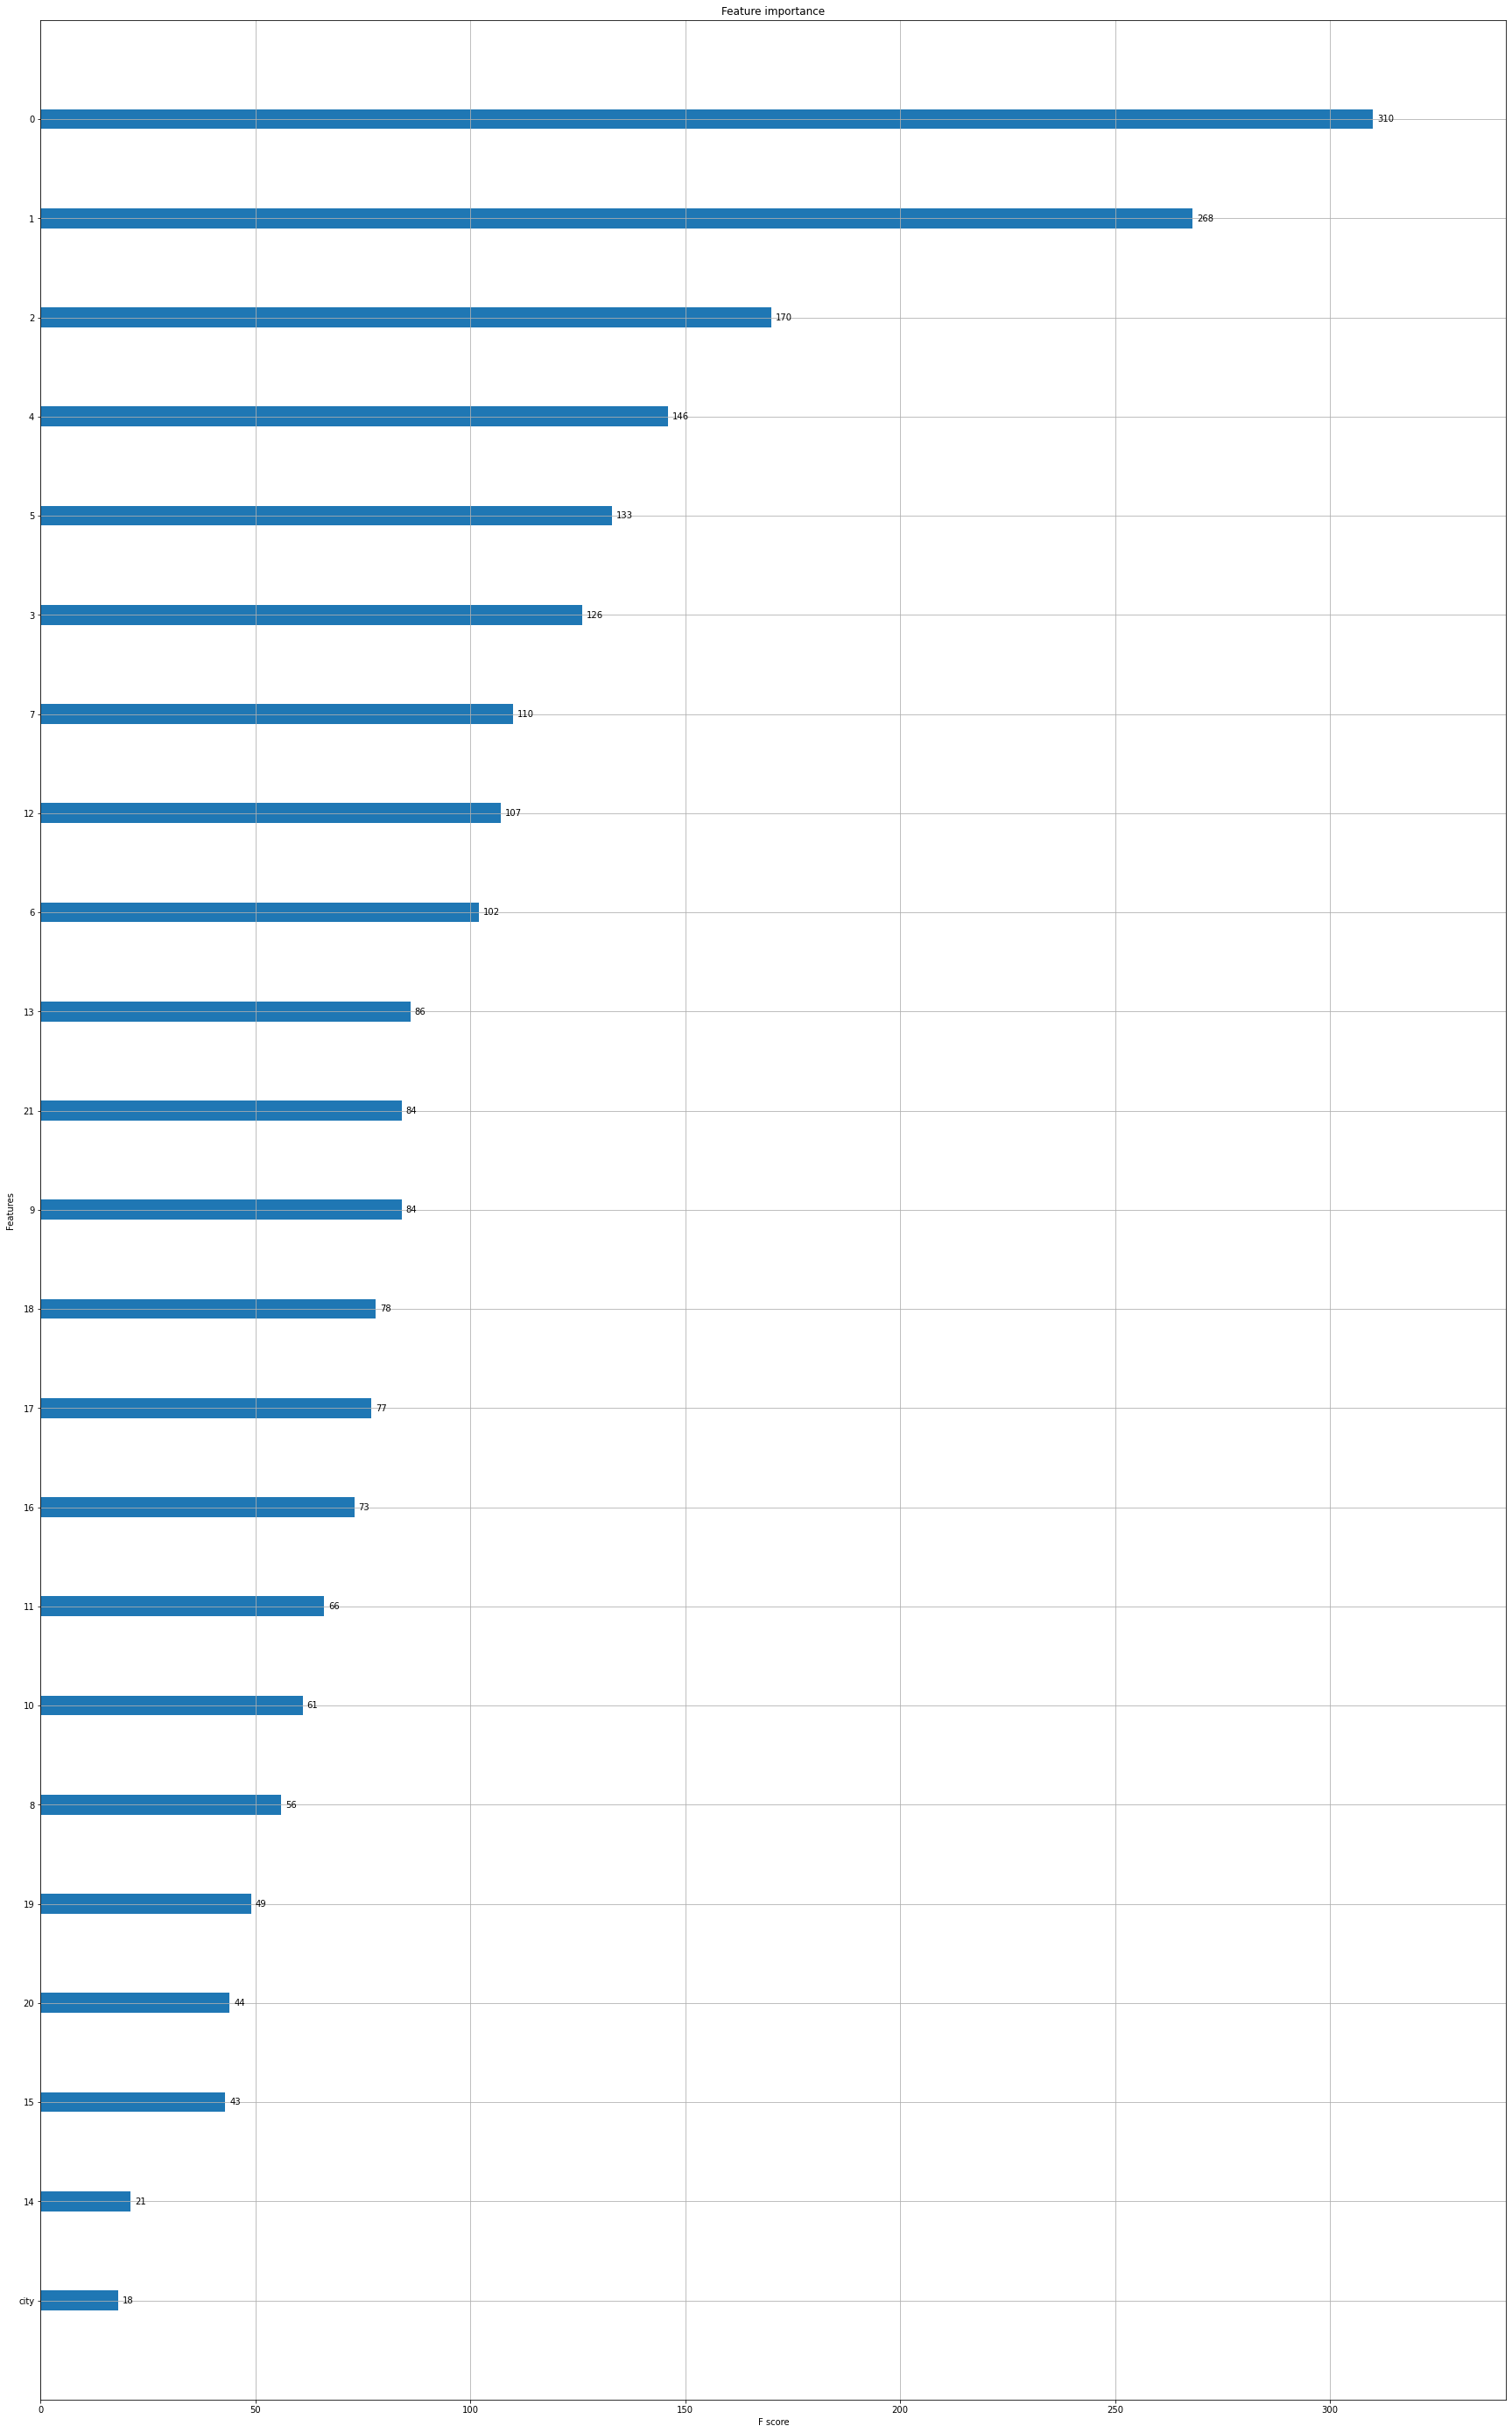

In [34]:
# ploting features importance
plt.figure(figsize=(5,5))
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [30, 50]
plt.show()

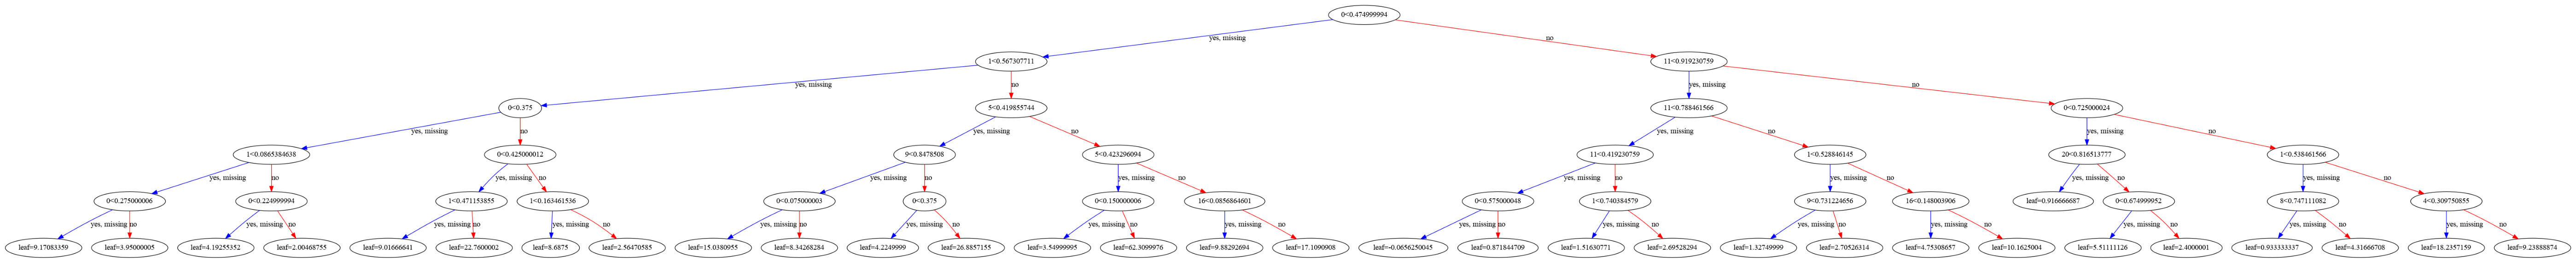

In [43]:
import matplotlib.pyplot as plt


xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [80, 40]
plt.show()